In [1]:
dataset = 'kaggle.com/datasets/lashagoch/life-expectancy-who-updated'

In [2]:
data_dir = './life-expectancy-who-updated'

import os
os.listdir(data_dir)
!pip install skillsnetwork[regular]
from tqdm import tqdm
!pip install opendatasets --upgrade
import opendatasets as od
od.download(dataset)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

from scipy.cluster import hierarchy
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans

def warn(*args,**kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

Skipping, found downloaded files in "./life-expectancy-who-updated" (use force=True to force download)


In [3]:
data = pd.read_csv('Life Expectancy Data Updated.csv')
data.sample(5)

Country          Region  Year  Infant_deaths  Under_five_deaths  \
2436         Rwanda          Africa  2008           50.2               76.3   
1063        Finland  European Union  2015            2.0                2.5   
882          Jordan     Middle East  2002           21.4               25.3   
1123  Venezuela, RB   South America  2012           14.9               17.3   
1222        Lesotho          Africa  2007           73.8              114.3   

      Adult_mortality  Alcohol_consumption  Hepatitis_B  Measles   BMI  ...  \
2436         272.4180                 7.51           97       87  21.5  ...   
1063          68.8685                 8.52           88       92  25.9  ...   
882          127.8375                 0.51           95       90  28.0  ...   
1123         146.1275                 6.80           81       83  26.6  ...   
1222         579.4120                 2.85           90       80  24.5  ...   

      Diphtheria  Incidents_HIV  GDP_per_capita  Population_mln  \
2436          97           1.22             554            9.52   
1063          97           0.08           42802            5.48   
882           95           0.13            3849            5.32   
1123          81           0.40           12986           29.36   
1222          88          15.31             912            1.99   

      Thinness_ten_nineteen_years  Thinness_five_nine_years  Schooling  \
2436                          6.7                       6.6        3.2   
1063                          0.9                       0.8       12.4   
882                           3.9                       3.9        9.6   
1123                          1.6                       1.5        9.7   
1222                          8.4                       8.3        5.5   

      Economy_status_Developed  Economy_status_Developing  Life_expectancy  
2436                         0                          1             60.6  
1063                         1                          0             81.5  
882                          0                          1             72.1  
1123                         0                          1             73.0  
1222                         0                          1             42.9  

[5 rows x 21 columns]

In [4]:
data.columns

Index(['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Life_expectancy'],
      dtype='object')

In [5]:
data.rename(columns={data.columns[3]:'Infant deaths',
                     data.columns[4]:'Under-5 deaths',
                     data.columns[5]:'Adult mortality',
                     data.columns[6]:'Alcohol consumption',
                     data.columns[7]:'Hepatitis B',
                     data.columns[12]:'HIV incidents',
                     data.columns[13]:'GDP (P.C.)',
                     data.columns[14]:'Population (Ms)',
                     data.columns[15]:'Thinness (10-19 years)',
                     data.columns[16]:'Thinness (5-9 years)',
                     data.columns[18]:'\'Developed\' status',
                     data.columns[19]:'\'Developing\' status',
                     data.columns[20]:'Life expectancy'},
                    inplace=True)

Index(['Country', 'Region', 'Year', 'Infant deaths', 'Under-5 deaths',
       'Adult mortality', 'Alcohol consumption', 'Hepatitis B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'HIV incidents', 'GDP (P.C.)',
       'Population (Ms)', 'Thinness (10-19 years)', 'Thinness (5-9 years)',
       'Schooling', ''Developed' status', ''Developing' status',
       'Life expectancy'],
      dtype='object')

In [6]:
print('Number of null entries:',data.isnull().sum().sum())
print('Number of duplicated rows:',data.duplicated().sum())

Number of null entries: 0
Number of duplicated rows: 0


In [7]:
data.sample(5)

Country          Region  Year  Infant deaths  Under-5 deaths  \
308               Serbia  Rest of Europe  2013            5.9             6.9   
1852  Russian Federation  Rest of Europe  2000           15.5            19.3   
1921           Mauritius          Africa  2005           13.4            15.6   
2282              Zambia          Africa  2004           67.1           115.2   
377           Kazakhstan            Asia  2003           30.8            35.2   

      Adult mortality  Alcohol consumption  Hepatitis B  Measles   BMI  ...  \
308          119.0550                 7.94           91       82  25.9  ...   
1852         300.6055                10.21           73       86  25.7  ...   
1921         161.2140                 3.83           97       78  24.8  ...   
2282         545.2940                 2.75           81       39  21.8  ...   
377          281.3740                 6.22           99       99  25.7  ...   

      Diphtheria  HIV incidents  GDP (P.C.)  Population (Ms)  \
308           95           0.02        5525             7.16   
1852          96           0.08        5324           146.60   
1921          97           1.08        6316             1.23   
2282          83           8.23         879            11.55   
377           99           0.05        6046            14.91   

      Thinness (10-19 years)  Thinness (5-9 years)  Schooling  \
308                      2.1                   2.1       10.4   
1852                     2.9                   3.0       11.3   
1921                     7.7                   7.6        7.2   
2282                     7.2                   7.1        6.2   
377                      2.5                   2.6       11.2   

      'Developed' status  'Developing' status  Life expectancy  
308                    0                    1             75.2  
1852                   0                    1             65.5  
1921                   0                    1             72.4  
2282                   0                    1             47.4  
377                    0                    1             65.7  

[5 rows x 21 columns]

In [8]:
data['\'Developed\' status'].value_counts()

0    2272
1     592
Name: 'Developed' status, dtype: int64

In [9]:
pd.Series({'Developed countries':data['\'Developed\' status'].value_counts(normalize=True)[1],
           'Developing countries':data['\'Developed\' status'].value_counts(normalize=True)[0]})

Developed countries     0.206704
Developing countries    0.793296
dtype: float64

In [10]:
corr_data = data[(x for x in data.columns if x not in ['Country','Region'])]
corr_columns = (np.unique(corr_data.columns))
corr_mat = corr_data.corr()

for x in range(len(corr_columns)):
    corr_mat.iloc[x,x] = '0'

corr_mat

Year Infant deaths Under-5 deaths Adult mortality  \
Year                           0     -0.172402      -0.176393        -0.15866   
Infant deaths          -0.172402             0       0.985651        0.794661   
Under-5 deaths         -0.176393      0.985651              0        0.802361   
Adult mortality         -0.15866      0.794661       0.802361               0   
Alcohol consumption    -0.000611     -0.454526      -0.409367       -0.244794   
Hepatitis B             0.176824     -0.512562      -0.507427       -0.344882   
Measles                 0.085945     -0.526282      -0.512972       -0.416153   
BMI                     0.161422     -0.661988      -0.665255       -0.522866   
Polio                   0.139858      -0.74079      -0.742983       -0.524226   
Diphtheria              0.145143     -0.721875      -0.725355       -0.513803   
HIV incidents          -0.081743      0.349458       0.369618        0.699119   
GDP (P.C.)              0.040998     -0.512286      -0.469682       -0.510121   
Population (Ms)         0.015158      0.007622      -0.005234       -0.053848   
Thinness (10-19 years) -0.044901      0.491192       0.466978         0.38214   
Thinness (5-9 years)   -0.048038      0.477639       0.450756        0.379792   
Schooling               0.150539     -0.788513      -0.773196       -0.581035   
'Developed' status          -0.0     -0.475866      -0.427134       -0.429375   
'Developing' status          0.0      0.475866       0.427134        0.429375   
Life expectancy         0.174359     -0.920032      -0.920419        -0.94536   

                       Alcohol consumption Hepatitis B   Measles       BMI  \
Year                             -0.000611    0.176824  0.085945  0.161422   
Infant deaths                    -0.454526   -0.512562 -0.526282 -0.661988   
Under-5 deaths                   -0.409367   -0.507427 -0.512972 -0.665255   
Adult mortality                  -0.244794   -0.344882 -0.416153 -0.522866   
Alcohol consumption                      0    0.168436  0.318603  0.284032   
Hepatitis B                       0.168436           0  0.429168  0.345421   
Measles                           0.318603    0.429168         0  0.416321   
BMI                               0.284032    0.345421  0.416321         0   
Polio                             0.301926    0.724345  0.514096  0.457206   
Diphtheria                        0.299016     0.76178  0.494059  0.426501   
HIV incidents                    -0.034118   -0.075782  -0.15058 -0.161142   
GDP (P.C.)                        0.443966    0.159375  0.313724   0.33618   
Population (Ms)                  -0.039119   -0.082396 -0.098222 -0.166482   
Thinness (10-19 years)           -0.446366   -0.208453 -0.340705 -0.596483   
Thinness (5-9 years)              -0.43303   -0.213794  -0.36697 -0.599112   
Schooling                         0.615728    0.347643  0.498391  0.635475   
'Developed' status                0.670366    0.113534  0.298693  0.243287   
'Developing' status              -0.670366   -0.113534 -0.298693 -0.243287   
Life expectancy                   0.399159    0.417804  0.490019  0.598423   

                           Polio Diphtheria HIV incidents GDP (P.C.)  \
Year                    0.139858   0.145143     -0.081743   0.040998   
Infant deaths           -0.74079  -0.721875      0.349458  -0.512286   
Under-5 deaths         -0.742983  -0.725355      0.369618  -0.469682   
Adult mortality        -0.524226  -0.513803      0.699119  -0.510121   
Alcohol consumption     0.301926   0.299016     -0.034118   0.443966   
Hepatitis B             0.724345    0.76178     -0.075782   0.159375   
Measles                 0.514096   0.494059      -0.15058   0.313724   
BMI                     0.457206   0.426501     -0.161142    0.33618   
Polio                          0   0.953178     -0.147952   0.313786   
Diphtheria              0.953178          0     -0.146932   0.313321   
HIV incidents          -0.147952  -0.146932           

In [11]:
corr_mat = corr_data.corr()

for x in range(len(corr_columns)):
    corr_mat.iloc[x,x] = 0.0

corr_mat.abs().idxmax()

Year                                 Hepatitis B
Infant deaths                     Under-5 deaths
Under-5 deaths                     Infant deaths
Adult mortality                  Life expectancy
Alcohol consumption           'Developed' status
Hepatitis B                           Diphtheria
Measles                            Infant deaths
BMI                               Under-5 deaths
Polio                                 Diphtheria
Diphtheria                                 Polio
HIV incidents                    Adult mortality
GDP (P.C.)                   'Developing' status
Population (Ms)             Thinness (5-9 years)
Thinness (10-19 years)      Thinness (5-9 years)
Thinness (5-9 years)      Thinness (10-19 years)
Schooling                          Infant deaths
'Developed' status           'Developing' status
'Developing' status           'Developed' status
Life expectancy                  Adult mortality
dtype: object

In [12]:
float_columns = [x for x in data.columns if x not in ['Country','Region','\'Developed\' status','\'Developing\' status']]

skew_columns = (data[float_columns]
                .skew()
                .sort_values(ascending=False))
skew_columns = skew_columns.loc[skew_columns>0.75]
skew_columns

Population (Ms)           8.157684
HIV incidents             4.978735
GDP (P.C.)                2.377248
Thinness (5-9 years)      1.769183
Thinness (10-19 years)    1.701487
Under-5 deaths            1.378054
Adult mortality           1.377683
Infant deaths             1.104122
dtype: float64

In [13]:
for col in skew_columns.index.tolist():
    data[col] = np.log1p(data[col])

In [14]:
data['Alcohol consumption'].sort_values(ascending=False)

2481    17.87
1688    17.75
1056    17.47
1589    17.29
1235    16.96
        ...  
578      0.00
1937     0.00
2041     0.00
1583     0.00
1048     0.00
Name: Alcohol consumption, Length: 2864, dtype: float64

[Text(0.5, 0, 'Alcohol consumption'), Text(0, 0.5, 'Frequency')]

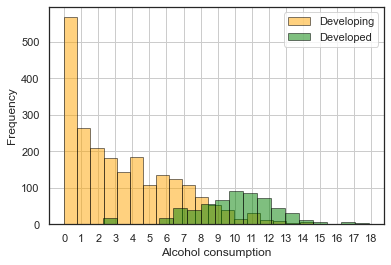

In [15]:
ax = plt.axes()

for status in [0,1]:
    s_data = data.loc[data['\'Developed\' status']==status,'Alcohol consumption']
    s_data.hist(bins=19,
                alpha=0.5,
                edgecolor='black',
                color=('orange' if status==0 else 'green'),
                label=status,
                ax=ax)

ax.legend(labels=['Developing','Developed'])
ax.set(xticks=range(19))
ax.set(xlabel='Alcohol consumption',ylabel='Frequency')

In [16]:
ss = StandardScaler()
data[float_columns] = ss.fit_transform(data[float_columns])
data.head()

Country          Region      Year  Infant deaths  Under-5 deaths  \
0  Turkiye     Middle East  1.626978      -0.532239       -0.563414   
1    Spain  European Union  1.626978      -1.738829       -1.656717   
2    India            Asia -0.108465       0.962269        0.912547   
3   Guyana   South America -0.325396       0.513845        0.443008   
4   Israel     Middle East  0.976187      -1.562381       -1.463061   

   Adult mortality  Alcohol consumption  Hepatitis B   Measles       BMI  ...  \
0        -0.764551            -0.879342     0.794574 -0.661700  1.261475  ...   
1        -1.816643             1.388788     0.794574  0.892723  0.440877  ...   
2         0.362060            -0.816547    -1.518979 -2.269725 -1.747384  ...   
3         0.537744             0.215791     0.544460 -0.179293  0.121756  ...   
4        -1.815188            -0.484993     0.794574  0.624719  0.896765  ...   

   Diphtheria  HIV incidents  GDP (P.C.)  Population (Ms)  \
0    0.690747      -0.536153    0.627964         1.450295   
1    0.690747      -0.519801    1.216609         1.094935   
2   -1.433965      -0.455862   -0.982404         3.307806   
3    0.433206       0.360229   -0.048334        -1.174667   
4    0.497592      -0.536153    1.409270        -0.055249   

   Thinness (10-19 years)  Thinness (5-9 years)  Schooling  \
0                0.363774              0.335283   0.052941   
1               -1.467220             -1.536322   0.652121   
2                2.553781              2.562619  -0.830060   
3                0.542187              0.492973   0.084477   
4               -1.020393             -1.070671   1.629730   

   'Developed' status  'Developing' status  Life expectancy  
0                   0                    1         0.812841  
1                   1                    0         1.482771  
2                   0                    1        -0.367513  
3                   0                    1        -0.197372  
4                   1                    0         1.365799  

[5 rows x 21 columns]

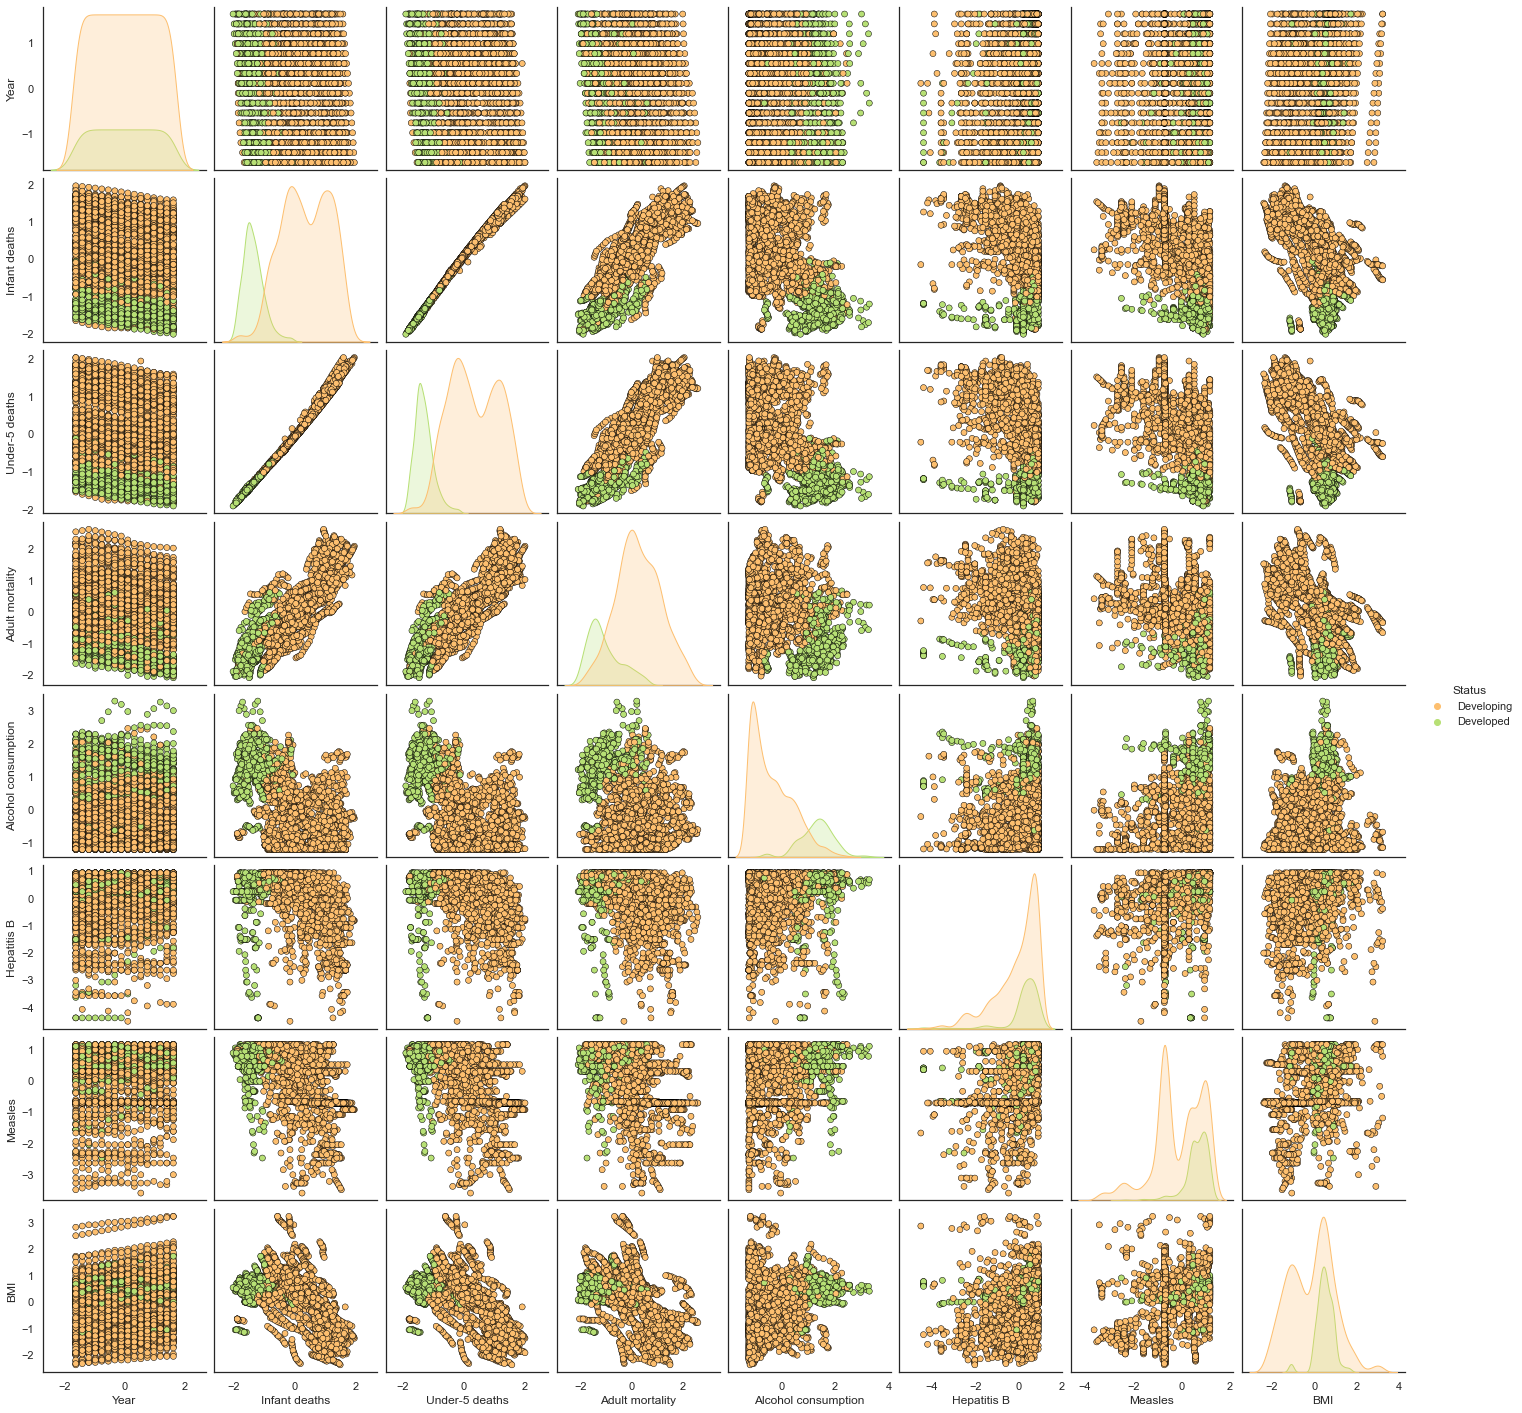

In [17]:
pair_data = data.assign(Status=data['\'Developed\' status'].map({0:'Developing',1:'Developed'}))

sns.pairplot(pair_data[float_columns[:int(len(float_columns)/2)]+['Status']],
             hue='Status',
             palette='RdYlGn',
             plot_kws=dict(edgecolor='black'))

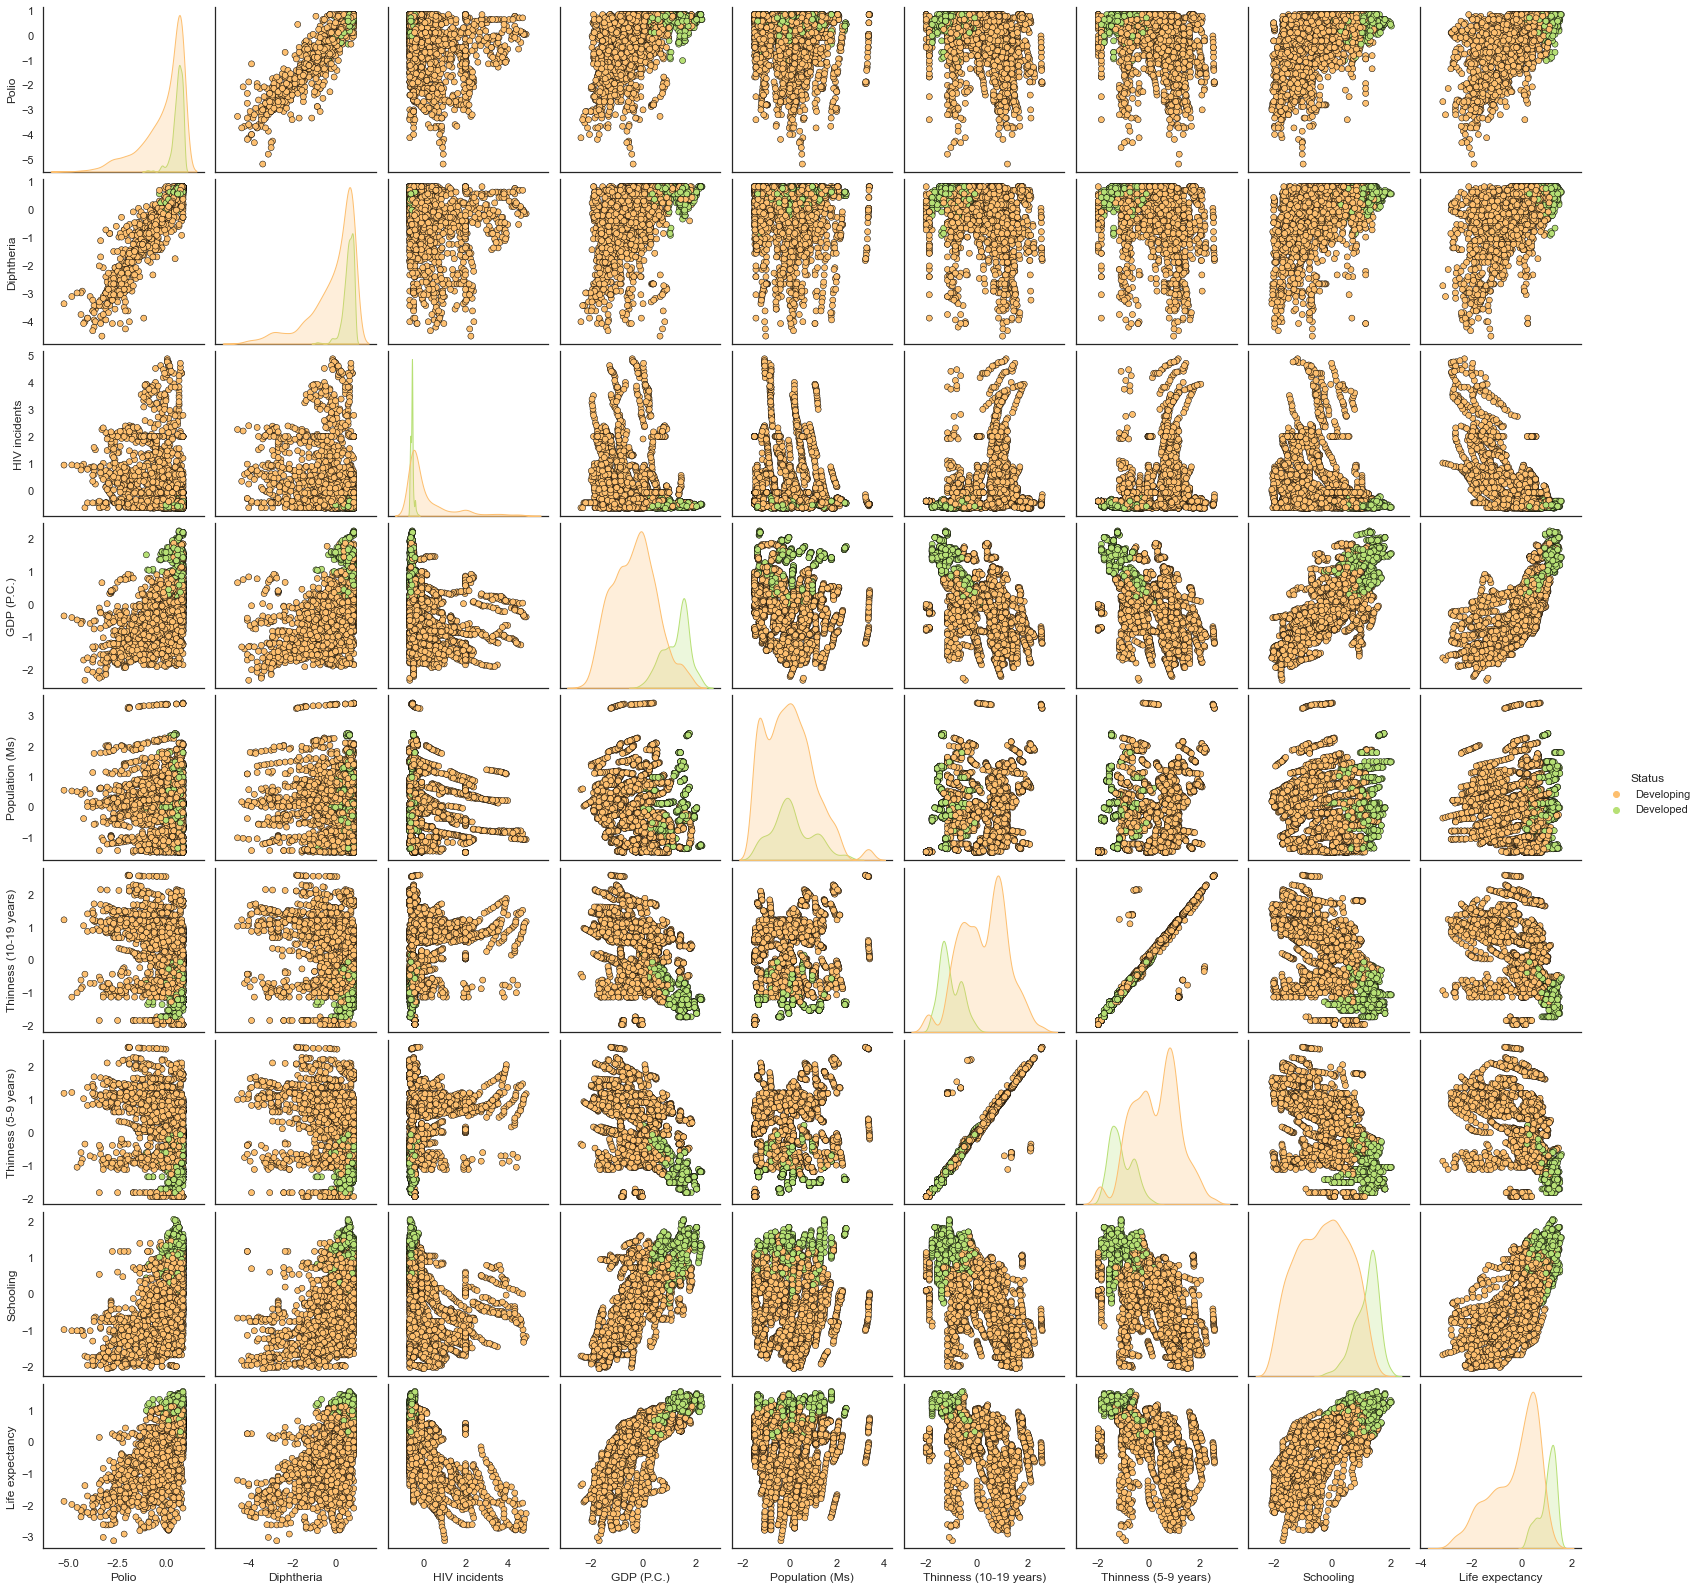

In [18]:
sns.pairplot(pair_data[float_columns[int(len(float_columns)/2):]+['Status']],
             hue='Status',
             palette='RdYlGn',
             plot_kws=dict(edgecolor='black'))

In [19]:
# K-MEANS
km = KMeans(n_clusters=2,random_state=42,init='k-means++')
data['k-means'] = pair_data['k-means'] = km.fit_predict(data[float_columns])

In [20]:
(pair_data[['Status','k-means']]
 .groupby(['Status','k-means'])
 .size()
 .to_frame()
 .rename(columns={0:'Occurrence'}))

Occurrence
Status     k-means            
Developed  0               592
Developing 0              1241
           1              1031

In [21]:
pair_data[pair_data['k-means']==0]['Status'].value_counts(normalize=True)

Developing    0.677032
Developed     0.322968
Name: Status, dtype: float64

In [22]:
pair_data[pair_data['k-means']==1]['Status'].value_counts(normalize=True)

Developing    1.0
Name: Status, dtype: float64

In [23]:
pca_data = PCA(n_components=2).fit_transform(data[float_columns])
plot_data = pd.DataFrame(pca_data,columns=['PC1','PC2'])
plot_data

PC1       PC2
0    -1.479382 -1.176968
1    -4.519521  0.562719
2     4.609749 -0.013430
3     0.465669 -0.999895
4    -4.103076  0.238198
...        ...       ...
2859  6.560475  1.300667
2860 -0.815255 -0.703455
2861  0.642348 -1.469638
2862 -2.065433 -0.199009
2863 -4.500690  0.716016

[2864 rows x 2 columns]

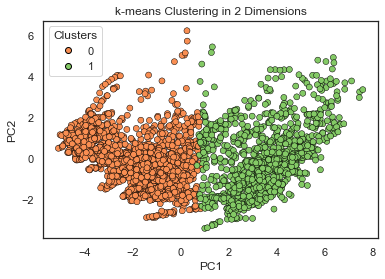

In [24]:
sns.scatterplot(x='PC1',y='PC2',hue=data['k-means'],data=plot_data,edgecolor='black',palette=[sns.color_palette('RdYlGn',3)[0],sns.color_palette('RdYlGn',3)[2]])

colors = (sns.color_palette('RdYlGn',3)[0],sns.color_palette('RdYlGn',3)[2])
handles = [plt.Line2D([0],[0],color='w',marker='o',mfc=color,mec='black')for color in colors]

plt.legend(handles,[0,1],title='Clusters')
plt.title('k-means Clustering in 2 Dimensions')
plt.show()

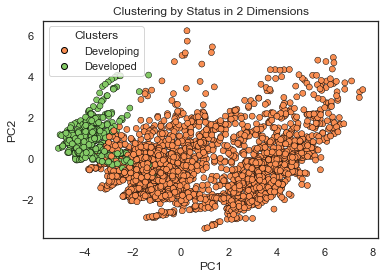

In [25]:
sns.scatterplot(x='PC1',y='PC2',data=plot_data,hue=pair_data['Status'],edgecolor='black',palette=[sns.color_palette('RdYlGn',3)[0],sns.color_palette('RdYlGn',3)[2]])

colors = (sns.color_palette('RdYlGn',3)[0],sns.color_palette('RdYlGn',3)[2])
handles = [plt.Line2D([0],[0],color='w',marker='o',mfc=color,mec='black')for color in colors]

plt.legend(handles,['Developing','Developed'],title='Clusters')
plt.title('Clustering by Status in 2 Dimensions')
plt.show()

In [26]:
print(f'k-means (2 clusters) silhouette score: {silhouette_score(data[float_columns],km.labels_)}')

k-means (2 clusters) silhouette score: 0.3555578753116817


In [27]:
km_list = list()

for clust in range(1,11):
    km = KMeans(n_clusters=clust,random_state=42)
    km = km.fit(data[float_columns])
    km_list.append(pd.Series({'clusters':clust, 
                              'inertia':km.inertia_,
                              'model':km}))

[Text(0.5, 0, 'Clusters'), Text(0, 0.5, 'Inertia')]

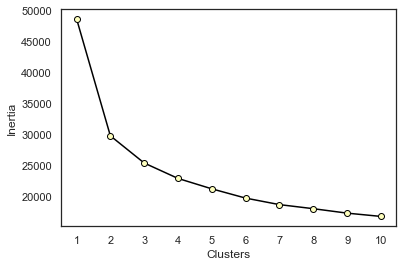

In [28]:
inertia_data = (pd.concat(km_list,axis=1)
                .T
                [['clusters','inertia']]
                .set_index('clusters'))

ax = inertia_data.plot(marker='o',ls='-',mfc=sns.color_palette('RdYlGn',3)[1],mec='black',c='black',legend=None)
ax.set_xticks(range(1,11))
ax.set(xlabel='Clusters',ylabel='Inertia')

In [29]:
km = KMeans(n_clusters=3,random_state=42)
data['k-means'] = pair_data['k-means'] = km.fit_predict(data[float_columns])

In [30]:
(pair_data[['Status','k-means']]
 .groupby(['Status','k-means'])
 .size()
 .to_frame()
 .rename(columns={0:'Occurrence'}))

Occurrence
Status     k-means            
Developed  0               568
           2                24
Developing 0               112
           1               929
           2              1231

In [31]:
pair_data[pair_data['k-means']==0]['Status'].value_counts(normalize=True)

Developed     0.835294
Developing    0.164706
Name: Status, dtype: float64

In [32]:
pair_data[pair_data['k-means']==1]['Status'].value_counts(normalize=True)

Developing    1.0
Name: Status, dtype: float64

In [33]:
pair_data[pair_data['k-means']==2]['Status'].value_counts(normalize=True)

Developing    0.980876
Developed     0.019124
Name: Status, dtype: float64

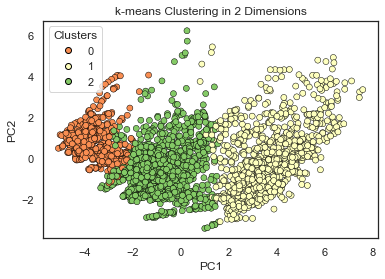

In [34]:
sns.scatterplot(x='PC1',y='PC2',data=plot_data,hue=data['k-means'],edgecolor='black',palette=sns.color_palette('RdYlGn',3))

colors = (sns.color_palette('RdYlGn',3)[0],sns.color_palette('RdYlGn',3)[1],sns.color_palette('RdYlGn',3)[2])
handles = [plt.Line2D([0],[0],color='w',marker='o',mfc=color,mec='black')for color in colors]

plt.legend(handles,[0,1,2],title='Clusters')
plt.title('k-means Clustering in 2 Dimensions')
plt.show()

In [35]:
print(f'k-means (3 clusters) silhouette score: {silhouette_score(data[float_columns],km.labels_)}')

k-means (3 clusters) silhouette score: 0.22676437615855335


In [36]:
# AGGLOMERATIVE
ag = AgglomerativeClustering(n_clusters=2,linkage='ward',compute_full_tree=True)
data['Agglomerative'] = pair_data['Agglomerative'] = ag.fit_predict(data[float_columns])

In [37]:
(pair_data[['Status','Agglomerative']]
 .groupby(['Status','Agglomerative'])
 .size()
 .to_frame()
 .rename(columns={0:'Occurrence'}))

Occurrence
Status     Agglomerative            
Developed  0                     592
Developing 0                    1426
           1                     846

In [38]:
pair_data[pair_data['Agglomerative']==0]['Status'].value_counts(normalize=True)

Developing    0.70664
Developed     0.29336
Name: Status, dtype: float64

In [39]:
pair_data[pair_data['Agglomerative']==1]['Status'].value_counts(normalize=True)

Developing    1.0
Name: Status, dtype: float64

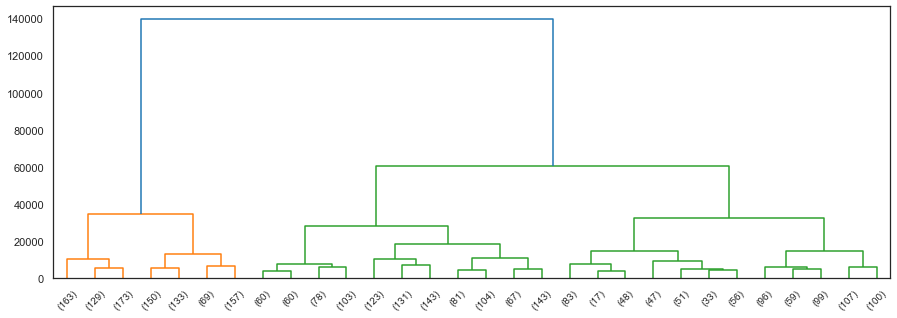

In [40]:
z = hierarchy.linkage(ag.children_,method='ward')
fig,ax = plt.subplots(figsize=(15,5))
den = hierarchy.dendrogram(z,p=30,ax=ax,orientation='top',truncate_mode='lastp',show_leaf_counts=True)

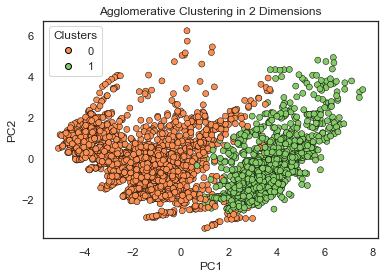

In [41]:
sns.scatterplot(x='PC1',y='PC2',data=plot_data,hue=data['Agglomerative'],edgecolor='black',palette=[sns.color_palette('RdYlGn',3)[0],sns.color_palette('RdYlGn',3)[2]])

colors = (sns.color_palette('RdYlGn',3)[0],sns.color_palette('RdYlGn',3)[2])
handles = [plt.Line2D([0],[0],color='w',marker='o',mfc=color,mec='black')for color in colors]

plt.legend(handles,[0,1],title='Clusters')
plt.title('Agglomerative Clustering in 2 Dimensions')
plt.show()

In [42]:
print(f'Agglomerative (2 clusters) silhouette score: {silhouette_score(data[float_columns],ag.labels_)}')

Agglomerative (2 clusters) silhouette score: 0.3482238052607183


In [43]:
ag_list = list()

for clust in range(2,11):
    ag = AgglomerativeClustering(n_clusters=clust,linkage='ward',compute_full_tree=True)
    ag = ag.fit_predict(data[float_columns])
    sil = silhouette_score(data[float_columns],ag)
    ag_list.append(pd.Series({'clusters':clust, 
                              'silhouette score':sil,
                              'model':ag}))
    
ag_list

[clusters                                                            2
 silhouette score                                             0.348224
 model               [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
 dtype: object,
 clusters                                                            3
 silhouette score                                             0.211352
 model               [1, 2, 0, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, ...
 dtype: object,
 clusters                                                            4
 silhouette score                                             0.175685
 model               [0, 2, 1, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, ...
 dtype: object,
 clusters                                                            5
 silhouette score                                             0.180862
 model               [0, 2, 1, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, ...
 dtype: object,
 clusters                                                            6
 silhouette s

[Text(0.5, 0, 'Clusters'), Text(0, 0.5, 'Silhouette score')]

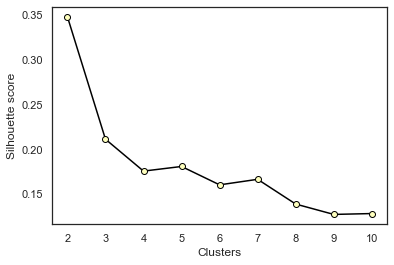

In [44]:
silhouette_data = (pd.concat(ag_list,axis=1)
                   .T
                   [['clusters','silhouette score']]
                   .set_index('clusters'))

ax = silhouette_data.plot(marker='o',ls='-',mfc=sns.color_palette('RdYlGn',3)[1],mec='black',c='black',legend=None)
ax.set_xticks(range(2,11))
ax.set(xlabel='Clusters',ylabel='Silhouette score')

In [45]:
# DBSCAN
db = DBSCAN(eps=3,min_samples=15)
data['DBSCAN'] = pair_data['DBSCAN'] = db.fit_predict(data[float_columns])

In [46]:
(pair_data[['Status','DBSCAN']]
 .groupby(['Status','DBSCAN'])
 .size()
 .to_frame()
 .rename(columns={0:'Occurrence'}))

Occurrence
Status     DBSCAN            
Developed   0             592
Developing -1              16
            0            2256

In [47]:
pair_data[pair_data['DBSCAN']==-1]['Status'].value_counts(normalize=True)

Developing    1.0
Name: Status, dtype: float64

In [48]:
pair_data[pair_data['DBSCAN']==0]['Status'].value_counts(normalize=True)

Developing    0.792135
Developed     0.207865
Name: Status, dtype: float64

In [49]:
eps_vals = np.linspace(0.5,5,10)
sam_vals = np.linspace(5,30,6)

best_sil = -1
ratio = 1

for eps in eps_vals:
    for sam in sam_vals:
        db = DBSCAN(eps=eps,min_samples=sam)
        db = db.fit_predict(data[float_columns])
        try:
            sil = silhouette_score(data[float_columns],db)
        except Exception:
            pass
        if sil > best_sil:
            if len(set(db)) > 2 and pd.Series(db).value_counts()[-1] < data.shape[0]/ratio:
                best_sil = sil
                optimal_eps = eps
                optimal_sam = sam

In [50]:
opt = pd.Series({'Best silhouette score':best_sil,
                 'Optimal epsilon':optimal_eps,
                 'Optimal minimum samples':optimal_sam})
opt.astype('object')

Best silhouette score      0.156534
Optimal epsilon                 2.5
Optimal minimum samples        25.0
dtype: object

In [51]:
db = DBSCAN(eps=2.5,min_samples=25)
data['DBSCAN'] = pair_data['DBSCAN'] = db.fit_predict(data[float_columns])

In [52]:
(pair_data[['Status','DBSCAN']]
 .groupby(['Status','DBSCAN'])
 .size()
 .to_frame()
 .rename(columns={0:'Occurrence'}))

Occurrence
Status     DBSCAN            
Developed  -1               5
            0             587
Developing -1             202
            0            2046
            1              24

In [53]:
pair_data[pair_data['DBSCAN']==-1]['Status'].value_counts(normalize=True)

Developing    0.975845
Developed     0.024155
Name: Status, dtype: float64

In [54]:
pair_data[pair_data['DBSCAN']==0]['Status'].value_counts(normalize=True)

Developing    0.77706
Developed     0.22294
Name: Status, dtype: float64

In [55]:
pair_data[pair_data['DBSCAN']==1]['Status'].value_counts(normalize=True)

Developing    1.0
Name: Status, dtype: float64

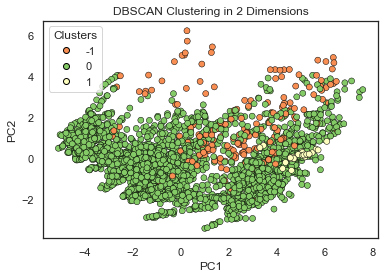

In [56]:
scatter1 = sns.scatterplot(x='PC1',y='PC2',data=plot_data,hue=data[data['DBSCAN'].isin([-1,0])]['DBSCAN'],edgecolor='black',palette=[sns.color_palette('RdYlGn',3)[0],sns.color_palette('RdYlGn',3)[2]])
scatter2 = sns.scatterplot(x='PC1',y='PC2',data=plot_data,hue=data[data['DBSCAN']==1]['DBSCAN'],edgecolor='black',palette=sns.color_palette('RdYlGn',1))

colors = (sns.color_palette('RdYlGn',3)[0],sns.color_palette('RdYlGn',3)[2],sns.color_palette('RdYlGn',3)[1])
handles = [plt.Line2D([0],[0],color='w',marker='o',mfc=color,mec='black')for color in colors]

plt.legend(handles,[-1,0,1],title='Clusters')
plt.title('DBSCAN Clustering in 2 Dimensions')
plt.show()

In [57]:
print(f'DBSCAN (2 clusters) silhouette score: {silhouette_score(data[float_columns],db.labels_)}')

DBSCAN (2 clusters) silhouette score: 0.156534055372245
